In [1]:
import multiprocessing

import numpy as np
import matplotlib.pyplot as plt

import cnn
import utils
import hmm

Using TensorFlow backend.


In [2]:
cpus = multiprocessing.cpu_count() // 2
print(f'CPUs: {cpus}')

CPUs: 8


In [3]:
x = 2
y = np.array(['a', 'b', 'c'])
s = np.array([1.0, 0.0])

real_hmm_train = hmm.HMM(
    x=x,
    y=y,
    a=np.array([
        [0.3, 0.7],
        [0.1, 0.9]
    ]),
    b=np.array([
        [0.6, 0.4, 0.0],
        [0.0, 0.0, 1.0]
    ]),
    s=s
)

real_hmm_val = hmm.HMM(
    x=x,
    y=y,
    a=np.array([
        [0.5, 0.5],
        [0.2, 0.8]
    ]),
    b=np.array([
        [0.1, 0.7, 0.2],
        [0.8, 0.0, 0.2]
    ]),
    s=s
)

real_hmm_rand = hmm.random_hmm(
    x=x,
    y=''.join(y),
    s=s
)

In [4]:
epoch_size = 100
batch_size = 100
seq_len = 20

train_data_gen = utils.HMMDataGenerator(
    real_hmm_train,
    epoch_size,
    batch_size,
    seq_len
)

val_data_gen = utils.HMMDataGenerator(
    real_hmm_val,
    epoch_size,
    batch_size,
    seq_len
)

rand_data_gen = utils.HMMDataGenerator(
    real_hmm_rand,
    epoch_size,
    batch_size,
    seq_len
)

In [5]:
t_hmm = real_hmm_rand
t_gen = rand_data_gen
v_hmm = real_hmm_val
v_gen = val_data_gen

## CNN 1

In [6]:
model = cnn.CNNModel(t_gen.input_shape())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 4)             40        
_________________________________________________________________
activation_1 (Activation)    (None, 18, 4)             0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

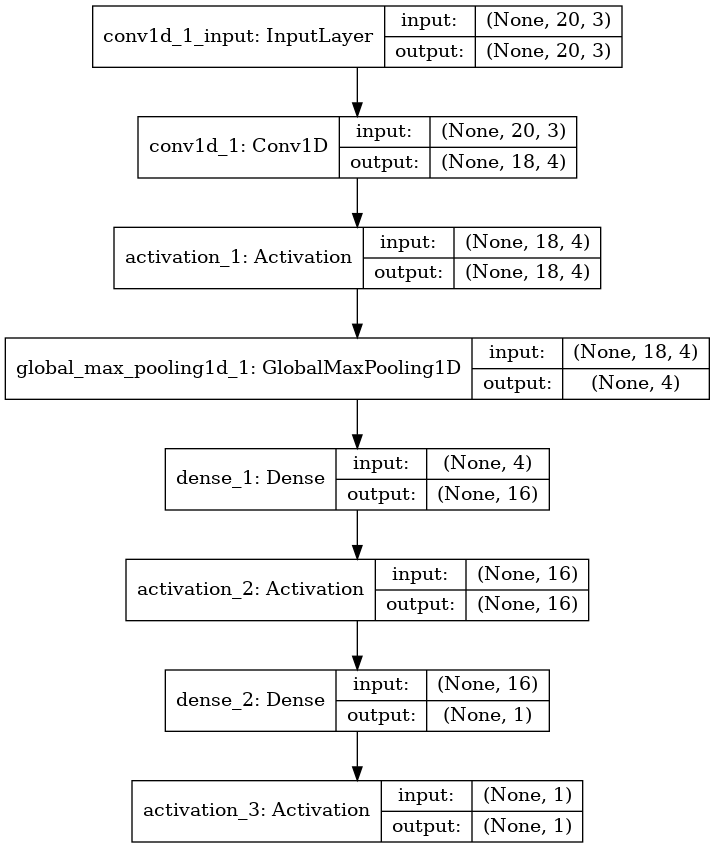

In [7]:
utils.plot_model(model, 'images/cnn1_arch.png')

In [8]:
epochs = 20

history = model.fit_generator(
    generator=t_gen,
    epochs=epochs,
#     validation_data=v_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 2s 24ms/step - loss: 0.6958 - accuracy: 0.5580
Epoch 2/20
Epoch 1/20
100/100 [==============================] - 1s 12ms/step - loss: 0.6701 - accuracy: 0.6703
Epoch 3/20
Epoch 2/20
100/100 [==============================] - 1s 12ms/step - loss: 0.6358 - accuracy: 0.6885
Epoch 4/20
100/100 [==============================] - 1s 11ms/step - loss: 0.6075 - accuracy: 0.6946
Epoch 5/20
100/100 [==============================] - 1s 11ms/step - loss: 0.5931 - accuracy: 0.6851
Epoch 6/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5803 - accuracy: 0.6996
Epoch 7/20
100/100 [==============================] - 1s 12ms/step - loss: 0.5796 - accuracy: 0.6967
Epoch 8/20
Epoch 7/20
100/100 [==============================] - 1s 12ms/step - loss: 0.5784 - accuracy: 0.6911
Epoch 9/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5717 - accuracy: 0.6979
Epoch 10/20
100/100 [==============================] - 1s 

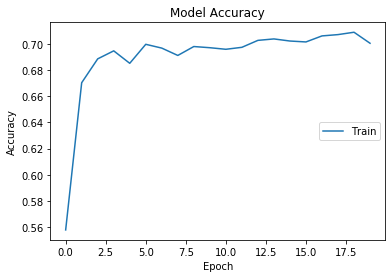

In [9]:
utils.plot_acc(history, 'images/cnn1_acc.png')

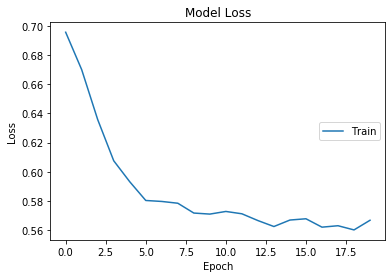

In [10]:
utils.plot_loss(history, 'images/cnn1_loss.png')

In [11]:
test_X = t_hmm.simulate(seq_len, reset_before=True)[1]
print(test_X)
test_X = np.array([t_gen._encode_hmm_outputs(test_X)])
print(test_X)

['c' 'b' 'a' 'c' 'c' 'b' 'c' 'b' 'b' 'c' 'a' 'b' 'b' 'c' 'c' 'b' 'b' 'b'
 'b' 'b']
[[[0. 0. 1.]
  [0. 1. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 1. 0.]
  [0. 0. 1.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 0. 1.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]]


In [12]:
p = model.predict(test_X)
print(p)

[[0.7266981]]


In [13]:
pred_real = bool(round(p[0][0]))
print(f'Predict real?: {pred_real}')

Predict real?: True


In [14]:
model2 = cnn.CNNModel2(t_gen.input_shape())
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 18, 4)             40        
_________________________________________________________________
activation_4 (Activation)    (None, 18, 4)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 4)              0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 7, 8)              104       
_________________________________________________________________
activation_5 (Activation)    (None, 7, 8)              0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

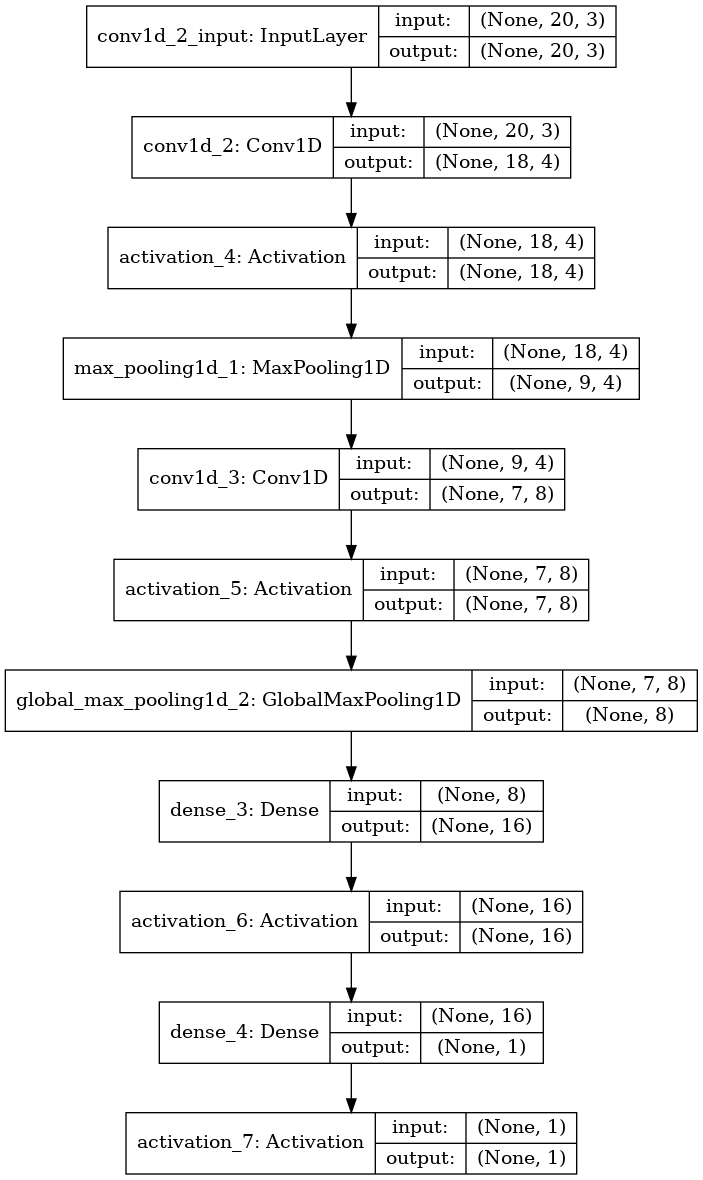

In [15]:
utils.plot_model(model2, to_file='images/cnn2_arch.png')

In [16]:
epochs = 20

history2 = model2.fit_generator(
    generator=t_gen,
    epochs=epochs,
#     validation_data=v_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 1s 14ms/step - loss: 0.6622 - accuracy: 0.6256
Epoch 2/20
Epoch 1/20
100/100 [==============================] - 1s 11ms/step - loss: 0.6054 - accuracy: 0.7137
Epoch 3/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5466 - accuracy: 0.7336
Epoch 4/20
Epoch 3/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5265 - accuracy: 0.7382
Epoch 5/20
Epoch 4/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5050 - accuracy: 0.7498
Epoch 6/20
100/100 [==============================] - 1s 11ms/step - loss: 0.5100 - accuracy: 0.7520
Epoch 7/20
100/100 [==============================] - 1s 11ms/step - loss: 0.4913 - accuracy: 0.7679
Epoch 8/20
Epoch 7/20
100/100 [==============================] - 1s 13ms/step - loss: 0.4770 - accuracy: 0.7745
Epoch 9/20
Epoch 8/20
100/100 [==============================] - 1s 13ms/step - loss: 0.4719 - accuracy: 0.7750
Epoch 10/20

100/100 [==============

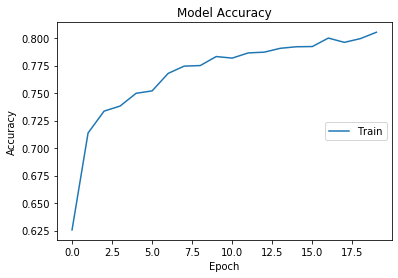

In [17]:
utils.plot_acc(history2, 'images/cnn2_acc.png')

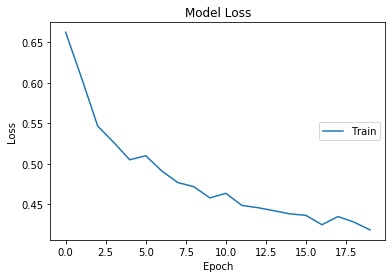

In [18]:
utils.plot_loss(history2, 'images/cnn2_loss.png')

# Model 3

In [19]:
model3 = cnn.CNNModel3(t_gen.input_shape())
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 18, 32)            320       
_________________________________________________________________
activation_8 (Activation)    (None, 18, 32)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 7, 64)             6208      
_________________________________________________________________
activation_9 (Activation)    (None, 7, 64)             0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

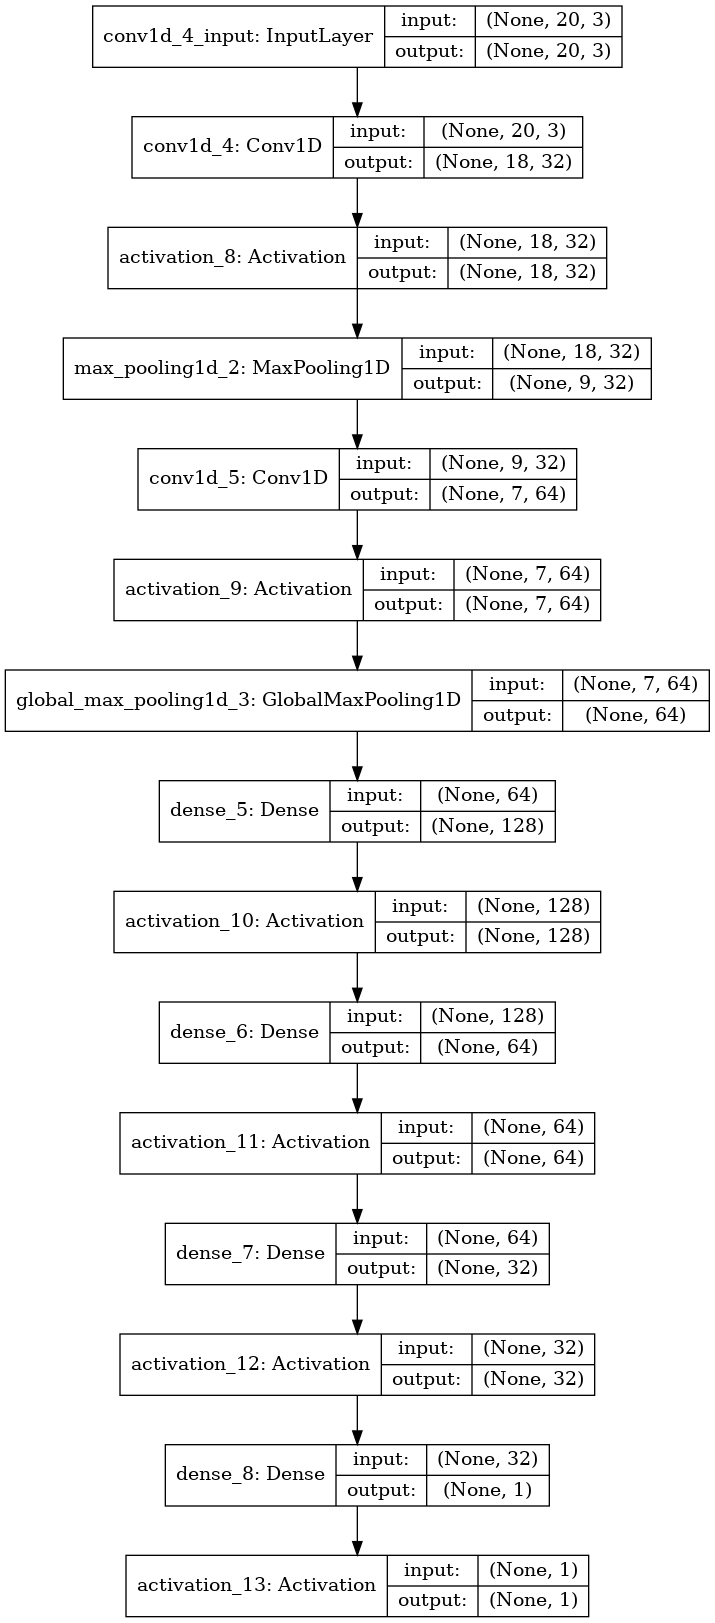

In [20]:
utils.plot_model(model3, 'images/cnn3_arch.png')

In [21]:
epochs = 20

history3 = model3.fit_generator(
    generator=t_gen,
    epochs=epochs,
#     validation_data=v_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 1s 15ms/step - loss: 0.5872 - accuracy: 0.6969
Epoch 2/20
Epoch 1/20
100/100 [==============================] - 1s 12ms/step - loss: 0.5429 - accuracy: 0.7277
Epoch 3/20
Epoch 2/20
100/100 [==============================] - 1s 12ms/step - loss: 0.5159 - accuracy: 0.7495
Epoch 4/20
100/100 [==============================] - 1s 12ms/step - loss: 0.4721 - accuracy: 0.7759
Epoch 5/20

100/100 [==============================] - 1s 13ms/step - loss: 0.4352 - accuracy: 0.8037
Epoch 6/20
100/100 [==============================] - 1s 13ms/step - loss: 0.4327 - accuracy: 0.8050
Epoch 7/20
100/100 [==============================] - 1s 13ms/step - loss: 0.4005 - accuracy: 0.8223
Epoch 8/20
100/100 [==============================] - 1s 11ms/step - loss: 0.3996 - accuracy: 0.8290
Epoch 9/20
Epoch 8/20
100/100 [==============================] - 1s 13ms/step - loss: 0.3789 - accuracy: 0.8375
Epoch 10/20
100/100 [==============================] - 1s

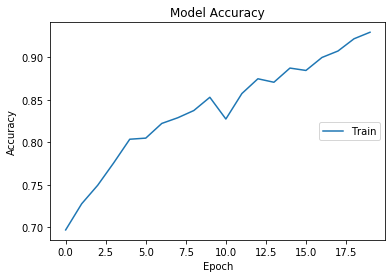

In [22]:
utils.plot_acc(history3, 'images/cnn3_acc.png')

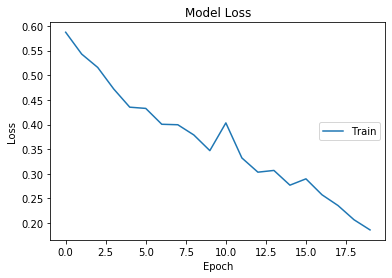

In [23]:
utils.plot_loss(history3, 'images/cnn3_loss.png')